# Test the DevTed-Package

# Import

In [2]:
import devted as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from typing import *
from devted.typing import *
from pandas import DataFrame, Series

In [3]:
BASE = "title xlabel ylabel set_kwargs"
ORIENT = f"{BASE} orient"

In [4]:
df = pd.read_csv("./data/titanic_data.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
d = {"hi": "hey", "ignore": "me"}
{k: v for k, v in d.items() if k not in ["ignore"]}

{'hi': 'hey'}

In [6]:
def zipparams(ignore: Vector = None):
    def decorator(func):
        def wrapper(*args, **kwargs):
            zip_params = {k: v for k, v in kwargs.items() if k not in ignore}
            return func(zip_params=zip_params, **kwargs)
        return wrapper
    return decorator

In [7]:
@zipparams(ignore="title xlabel ylabel set_kws".split())
def histplot(
    *,
    x: str = None,
    data: DataFrame = None,
    title: str = "TITLE",
    xlabel: str | None = None,
    ylabel: str | None = None,
    bins: str | int | Vector = "auto",
    hue: Any | None = None,
    kde: bool = False,
    palette: Any | None = None,
    color: Any | None = None,
    legend: bool = True,
    ax: Any | None = None,
    set_kws: dict = None,
    cumulative: bool = False,
    multiple: Literal["layer", "dodge", "stack", "fill"] = "layer",
    element: Literal["bars", "step", "poly"] = "bars",
    fill: bool = True,
    kde_kws: Any | None = None,
    zip_params: dict = None,
    **kwargs: Any
) -> plt.Axes | tuple[plt.Axes, DataFrame]:
    set_kwargs = (
        {"title": title} | 
        ({} if not xlabel else {"xlabel": xlabel}) |
        ({} if not xlabel else {"xlabel": xlabel}) |
        ({} if not ylabel else {"ylabel": ylabel}) |
        ({} if not isinstance(set_kws, dict) else set_kws)
    )

    ax = sns.histplot(**zip_params)
    ax.set(**set_kwargs)
    return ax

<AxesSubplot:title={'center':'MYTITLE'}, xlabel='Myxlabel', ylabel='Myylabel'>

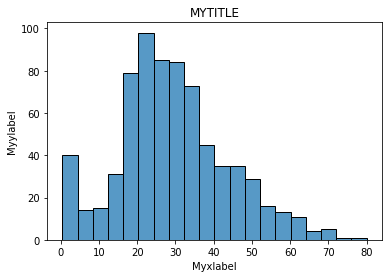

In [8]:
dt.histplot(x="Age", data=df, xlabel="myxlabel", set_kwargs={"ylabel": "myylabel"}, title="myTitle")

<AxesSubplot:title={'center':'MyTitle'}, xlabel='XLAB', ylabel='YLAB'>

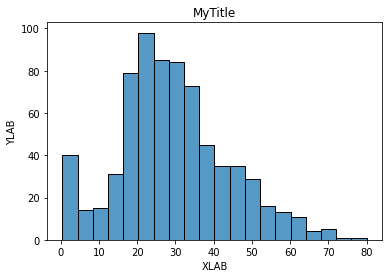

In [9]:
histplot(x="Age", data=df, title="MyTitle", xlabel="XLAB", set_kws={"ylabel": "YLAB"})

[Text(0.5, 1.0, 'HELLO'), Text(0.5, 0, 'hello'), Text(0, 0.5, 'My')]

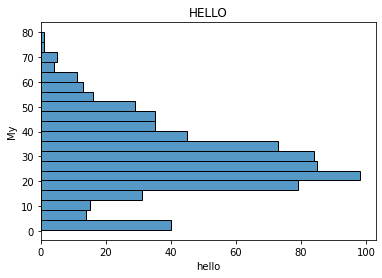

In [10]:
sns.histplot(y="Age", data=df).set(title="HELLO", xlabel="hello", ylabel="My")

## Countplot

In [11]:
def _prep_title(kwargs: dict) -> dict:
    kwargs["title"] = kwargs.get("title", "TITLE").upper()
    return kwargs


def _prep_labels(kwargs: dict) -> dict:
    xlabel: str = kwargs.get("xlabel", None)
    ylabel: str = kwargs.get("ylabel", None)
    if xlabel:
        kwargs["xlabel"] = xlabel.capitalize()
    if ylabel:
        kwargs["ylabel"] = ylabel.capitalize()
    return kwargs

In [12]:
def _prep_set_kwargs(
    title: str, 
    xlabel: str | None,
    ylabel: str | None,
    set_kws: dict | None
) -> dict:
    set_kwargs = (
        {"title": title} | 
        ({} if not xlabel else {"xlabel": xlabel}) |
        ({} if not ylabel else {"ylabel": ylabel}) |
        ({} if not isinstance(set_kws, dict) else set_kws)
    )
    set_kwargs = _prep_title(set_kwargs)
    set_kwargs = _prep_labels(set_kwargs)
    return set_kwargs

In [13]:
def _plot(
    plot_func: Callable,
    plot_kwargs: dict,
    set_kwargs
) -> plt.Axes:
    ax = plot_func(**plot_kwargs)
    ax.set(**set_kwargs)
    return ax

In [14]:
@zipparams(ignore="title xlabel ylabel set_kws orient".split())
def countplot(*, 
    x: str = None, 
    hue: Any | None = None, 
    data: Any | None = None, 
    title: str = "TITLE",
    xlabel: str | None = None,
    ylabel: str | None = None,
    order: Any | None = None, 
    hue_order: Any | None = None, 
    orient: Literal["h", "v"] = "v",
    set_kws: dict = None,
    color: Any | None = None, 
    palette: Any | None = None, 
    ax: Any | None = None, 
    zip_params: dict = None,
    **kwargs: Any
) -> plt.Axes:
    if orient == "h":
        zip_params["y"] = zip_params["x"]
        del zip_params["x"]
    set_kwargs = _prep_set_kwargs(
        title,
        xlabel,
        ylabel,
        set_kws
    )
    return _plot(sns.countplot, zip_params, set_kwargs)

<AxesSubplot:title={'center':'TITLE'}, xlabel='count', ylabel='Embarked'>

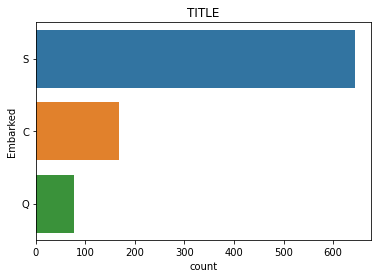

In [15]:
countplot(x="Embarked", data=df, orient="h")

<AxesSubplot:xlabel='count', ylabel='Embarked'>

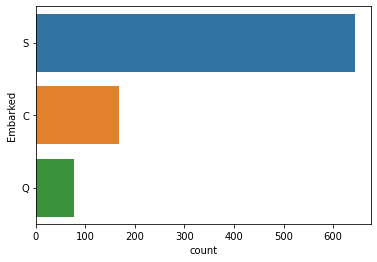

In [16]:
sns.countplot(y="Embarked", data=df, orient="v")

## pointplot

In [17]:
@zipparams(ignore="title xlabel ylabel set_kws".split())
def pointplot(
    *,
    x: Any | None = None,
    y: Any | None = None,
    hue: Any | None = None,
    data: Any | None = None,
    title: str = "TITLE",
    xlabel: str | None = None,
    ylabel: str | None = None,
    order: Vector | None = None,
    hue_order: Vector | None = None,
    ci: int = 95,
    errorbar: Literal["ci", "pi", "se", "sd"] = "ci",
    markers: Marker = "o",
    linestyles: LineStyle = "-",
    ax: Any | None = None,
    set_kws: dict = None,
    zip_params: dict,
    **kwargs: Any
) -> plt.Axes:
    set_kwargs = _prep_set_kwargs(
        title,
        xlabel,
        ylabel,
        set_kws
    )
    return _plot(
        sns.pointplot,
        zip_params,
        set_kwargs
    )

<AxesSubplot:title={'center':'TITLE'}, xlabel='Pclass', ylabel='Survived'>

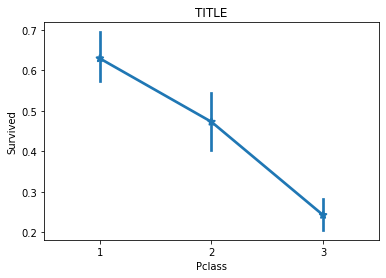

In [18]:
pointplot(x="Pclass", y="Survived", data=df, markers="*")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

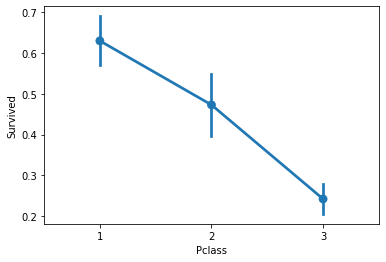

In [19]:
sns.pointplot(x="Pclass", y="Survived", data=df)

## Scatterplot

In [20]:
# Basic

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

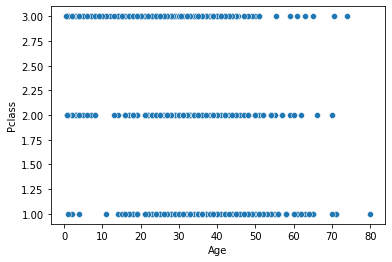

In [21]:
sns.scatterplot(x="Age", y="Pclass", data=df)

In [22]:
@zipparams(ignore=BASE.split())
def scatterplot(
    *,
    x: str = None,
    y: str = None,
    data: DataFrame = None,
    title: str = "TITLE",
    xlabel: Union[str, None] = None,
    ylabel: Union[str, None] = None,
    hue: Union[str, None] = None,
    alpha: Union[float, None] = None,
    ax: Union[plt.Axes, None] = None,
    set_kwargs: dict = None,
    zip_params: dict
) -> plt.Axes:
    set_kwargs = _prep_set_kwargs(
        title,
        xlabel,
        ylabel,
        set_kwargs
    )
    return _plot(
        sns.scatterplot,
        zip_params,
        set_kwargs
    )

<AxesSubplot:title={'center':'HELLO TITLE'}, xlabel='Age', ylabel='Class'>

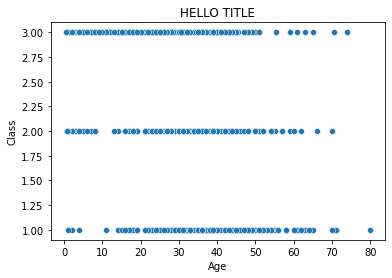

In [23]:
scatterplot(x="Age", y="Pclass", data=df, ylabel="class", set_kwargs={"title": "Hello Title"})

## Barplot

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

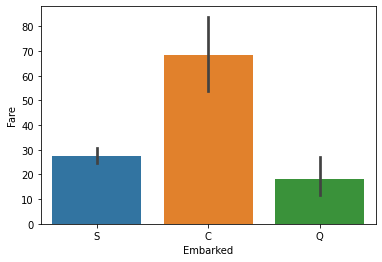

In [44]:
sns.barplot(x="Embarked", y="Fare", data=df)

In [53]:
@zipparams(ignore=BASE.split())
def barplot(
    *,
    x: str = None,
    y: str = None,
    data: DataFrame = None,
    title: str = "TITLE",
    xlabel: Union[str, None] = None,
    ylabel: Union[str, None] = None,
    order: Union[Vector, None] = None,
    hue: Union[str, None] = None,
    hue_order: Union[Vector, None] = None,
    ci: Union[int, None] = 95,
    orient: Literal["h", "v"] = "v",
    ax: Union[plt.Axes, None] = None,
    set_kwargs: dict = None,
    zip_params: dict
) -> plt.Axes:
    set_kwargs = _prep_set_kwargs(
        title,
        xlabel,
        ylabel,
        set_kwargs
    )
    return _plot(
        sns.barplot,
        zip_params,
        set_kwargs
    )

<AxesSubplot:title={'center':'TITLE'}, xlabel='Fare', ylabel='Embarked'>

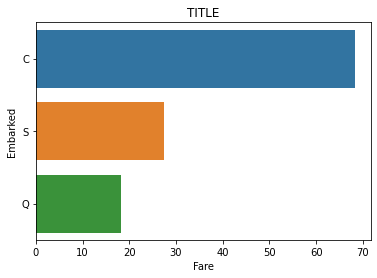

In [58]:
barplot(y="Embarked", x="Fare", data=df, orient="h", order=["C", "S", "Q"], ci=None)